In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import pprint
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"E:\SMS Spam Detection\spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df = df.rename(columns={'v1':"label",'v2':"sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print("Length of Datasets : ",len(df))

Length of Datasets :  5572


In [8]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
print("Unique Value : ",df['label'].unique())

Unique Value :  ['ham' 'spam']


In [11]:
df['sms'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [12]:
df['length'] = df['sms'].apply(len)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

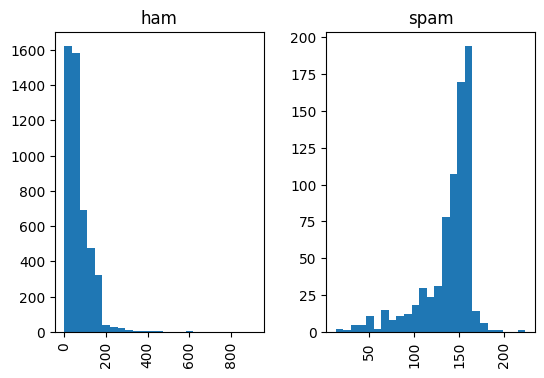

In [13]:
df.hist(column='length',by='label',bins=25,figsize=(6,4))

In [14]:
df['label'].dropna(inplace=True)

In [15]:
df['label'].isnull().sum()

np.int64(0)

In [16]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [17]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

will be doing tokanization that means we will separate the words from the text and count its frequency 

We will be doing them into lower case of bags of words

In [18]:
documents = [
    "Hello, how are you ?",
    "u got the lottery",
    "maY i call u tommorrow ?",
    "URGENT: Your account has been compromised. Click here [Link] to verify your identity immediately or your funds will be frozen.",
    "Congratulations! Your phone number was selected as the winner of a $1,000 Amazon Gift Card. Claim your prize here: [Link]",
    "Your appointment with Dr. Smith is confirmed for Tuesday at 10:15 AM. Please arrive 10 minutes early",
    "I'm just finishing up at the gym. I'll be home in about twenty minutes to start cooking."
]
documnets_lower = []
documnets_lower = [d.lower() for d in documents]
print(documnets_lower)

['hello, how are you ?', 'u got the lottery', 'may i call u tommorrow ?', 'urgent: your account has been compromised. click here [link] to verify your identity immediately or your funds will be frozen.', 'congratulations! your phone number was selected as the winner of a $1,000 amazon gift card. claim your prize here: [link]', 'your appointment with dr. smith is confirmed for tuesday at 10:15 am. please arrive 10 minutes early', "i'm just finishing up at the gym. i'll be home in about twenty minutes to start cooking."]


lets remove all the punctuation

In [19]:
documents_punc = []
for i in documnets_lower:
    documents_punc.append(i.translate(str.maketrans('','',string.punctuation)))

documents_punc

['hello how are you ',
 'u got the lottery',
 'may i call u tommorrow ',
 'urgent your account has been compromised click here link to verify your identity immediately or your funds will be frozen',
 'congratulations your phone number was selected as the winner of a 1000 amazon gift card claim your prize here link',
 'your appointment with dr smith is confirmed for tuesday at 1015 am please arrive 10 minutes early',
 'im just finishing up at the gym ill be home in about twenty minutes to start cooking']

Spliting this words

In [20]:
pre_documents = [[w for w in d.split()] for d in documents_punc]
pre_documents

[['hello', 'how', 'are', 'you'],
 ['u', 'got', 'the', 'lottery'],
 ['may', 'i', 'call', 'u', 'tommorrow'],
 ['urgent',
  'your',
  'account',
  'has',
  'been',
  'compromised',
  'click',
  'here',
  'link',
  'to',
  'verify',
  'your',
  'identity',
  'immediately',
  'or',
  'your',
  'funds',
  'will',
  'be',
  'frozen'],
 ['congratulations',
  'your',
  'phone',
  'number',
  'was',
  'selected',
  'as',
  'the',
  'winner',
  'of',
  'a',
  '1000',
  'amazon',
  'gift',
  'card',
  'claim',
  'your',
  'prize',
  'here',
  'link'],
 ['your',
  'appointment',
  'with',
  'dr',
  'smith',
  'is',
  'confirmed',
  'for',
  'tuesday',
  'at',
  '1015',
  'am',
  'please',
  'arrive',
  '10',
  'minutes',
  'early'],
 ['im',
  'just',
  'finishing',
  'up',
  'at',
  'the',
  'gym',
  'ill',
  'be',
  'home',
  'in',
  'about',
  'twenty',
  'minutes',
  'to',
  'start',
  'cooking']]

calculating frequency

In [21]:
frequency_list = []
frequency_list = [Counter(d) for d in pre_documents]
frequency_list

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'u': 1, 'got': 1, 'the': 1, 'lottery': 1}),
 Counter({'may': 1, 'i': 1, 'call': 1, 'u': 1, 'tommorrow': 1}),
 Counter({'your': 3,
          'urgent': 1,
          'account': 1,
          'has': 1,
          'been': 1,
          'compromised': 1,
          'click': 1,
          'here': 1,
          'link': 1,
          'to': 1,
          'verify': 1,
          'identity': 1,
          'immediately': 1,
          'or': 1,
          'funds': 1,
          'will': 1,
          'be': 1,
          'frozen': 1}),
 Counter({'your': 2,
          'congratulations': 1,
          'phone': 1,
          'number': 1,
          'was': 1,
          'selected': 1,
          'as': 1,
          'the': 1,
          'winner': 1,
          'of': 1,
          'a': 1,
          '1000': 1,
          'amazon': 1,
          'gift': 1,
          'card': 1,
          'claim': 1,
          'prize': 1,
          'here': 1,
          'link': 1}),
 Counter(

In [22]:
count_vector = CountVectorizer()
count_vector.fit(documents)

CountVectorizer()

In [23]:
doc_array = count_vector.transform(documents).toarray()

frequency_matrix = pd.DataFrame(doc_array,columns=count_vector.get_feature_names_out())
frequency_matrix

,000,10,15,about,account,am,amazon,appointment,are,arrive,...,twenty,up,urgent,verify,was,will,winner,with,you,your
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,3
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,2
5,0,2,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
6,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [24]:
X_train,X_test,y_train,y_test = train_test_split(df['sms'],df['label'],test_size=0.20,random_state=1)

In [28]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [29]:
nb = MultinomialNB()

nb.fit(training_data,y_train)

MultinomialNB()

In [30]:
MultinomialNB(alpha=0.1,class_prior=None,fit_prior=True)

MultinomialNB(alpha=0.1)

In [31]:
predictions = nb.predict(testing_data)

In [32]:
print("Accuracy : {}".format(accuracy_score(y_test,predictions)))
print("Precision : {}".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall : {}".format(recall_score(y_test,predictions,pos_label=1)))
print("F1 Score : {}".format(f1_score(y_test,predictions,pos_label=1)))

Accuracy : 0.9847533632286996
Precision : 0.9420289855072463
Recall : 0.935251798561151
F1 Score : 0.9386281588447654


In [33]:
import pickle
pickle.dump(count_vector,open('vectorizer.pkl','wb'))
pickle.dump(nb,open('model.pkl','wb'))